<a href="https://colab.research.google.com/github/Khomkrit007/Big-data/blob/main/Text_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project 1: Text Analytics

<img src="https://www.datanami.com/wp-content/uploads/2014/06/text-analytics.png" width="500" />

ชื่อกลุ่ม: ...

รายชื่อสมาชิก การแบ่งงาน และสัดส่วนในการทำงาน:
1. ...
2. ...
3. ...
4. ...

กำหนดส่ง: พุธ 18 กันยายน 2567 \
รายงานในชั้นเรียน: พฤหัสบดี 19 กันยายน 2567

**ผลที่คาดหวังจากการทำงานนี้**
* สามารถใช้ Python ในการอ่านข้อมูล
* จัดการกับข้อมูลเบื้องต้นในรูปแบบข้อความก่อนนำไปวิเคราะห์
* สามารถวิเคราะห์ข้อมูลตัวอักษรเบื้องต้นและสร้าง Data Visualization ที่เหมาะสมได้
----------------------

In [5]:
"""
หากไม่สามารถลง library ใด ให้ดาวน์โหลดดังตัวอย่างต่อไปนี้
!pip3 install numpy
!pip install nltk
!pip3 install wordcloud
"""
# Load these libraries
import json
import pprint
import pandas as pd
import numpy as np
from io import StringIO # using StringIO to prevent ValueError
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import urllib.request

import matplotlib.pyplot as plt
%matplotlib inline

## Problem 1: Working with Twitter Data and JSON file
จากข้อมูลทวิตเตอร์เกี่ยวกับประเทศไทยที่เก็บในวันที่ 31 สิงหาคม 2565 ในรูปแบบ JSON จาก `thailand_tweets.txt` ซึ่งมีการดึงข้อมูลมาด้วยคีเวิร์ด "Thailand" ให้ทำการศึกษาข้อมูลและดึงค่าจากข้อมูล \
ทั้งนี้เราสามารถเรียกหน้าทวีตจาก tweet ID ได้ดังนี้
```
twitter.com/anyuser/status/<tweet_id>
```
หมายเหตุ: ไม่ต้องนำเสนอข้อนี้

#### Read JSON file

In [ ]:
import json

with open('thailand_tweets.txt', 'r') as f:
  for line in f:
    tweet = json.loads(line)
    # process each tweet here
    print(tweet)


#### Inspect data in JSON format (either reading using pretty print or Pandas data frame)

In [ ]:
# ----------------- Your code here -----------------


#### Report: จงตอบคำถามต่อไปนี้
* The total number of tweets collected in the file:
* The content of the first tweet:
* Is the first tweet contained any hashtags or mentions?
* Collect all hashtags related to Thailand from this data:
* Find the most popular tweets in your collection of tweets, i.e. the tweets with the largest number of retweet/replies/likes counts  
* Display the top 5 tweets that are the most popular among your collection \
สามารถใช้ `np.argsort(<list>)[:5]` ซึ่งจะแสดงผล indices ของการเรียงค่าจากน้อยสุดไปมากสุด จำนวน 5 ค่า และ `np.argsort(<list>)[::-1][:5]` จะแสดงผล indices ของการเรียงค่าจากมากไปน้อยจำนวน 5 ค่า (https://numpy.org/doc/stable/reference/generated/numpy.argsort.html)
* Create a word cloud of words in the contents; however, we note that this word cloud is not a good representation of Thailand as the data size is small

In [ ]:
# ----------------- Your code here -----------------


## Problem 2: Study Collected Yelp Reviews

![](https://techcrunch.com/wp-content/uploads/2022/08/Yelp-Android_Full-Experience.jpg?w=1390&crop=1)

ดาวน์โหลด Yelp dataset เกี่ยวกับรีวิวของผู้ใช้บริการธุรกิจต่าง ๆ จาก https://www.yelp.com/dataset
<br>
รายละเอียดข้อมูล https://www.yelp.com/dataset/documentation/main
<br>
ให้ศึกษาข้อมูลจากไฟล์ yelp_academic_dataset_review.json, yelp_academic_dataset_business.json, และ yelp_academic_dataset_user.json

### อ่านข้อมูล Reviews, Businesses, และ Users เป็นจำนวน 100,000 รีวิว

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# เปลี่ยน path ของ working directory เช่น ที่ไหนใน Google Drive
myDirectory = "/content/drive/MyDrive/3-1/Bigdata/yelp_dataset"
reviewFilePath = "/yelp_academic_dataset_review.json"
businessFilePath = "/yelp_academic_dataset_business.json"
userFilePath = "/yelp_academic_dataset_user.json"

อ่านข้อมูล review

In [130]:
# We only use the first 100,000 reviews
n = 100000
reviews = []
with open(myDirectory+reviewFilePath) as fl:
    for i, line in enumerate(fl):
        reviews.append(json.loads(line))
        if i+1 >= n:
            break
reviews = pd.DataFrame(reviews)
reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [30]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   review_id    100000 non-null  object 
 1   user_id      100000 non-null  object 
 2   business_id  100000 non-null  object 
 3   stars        100000 non-null  float64
 4   useful       100000 non-null  int64  
 5   funny        100000 non-null  int64  
 6   cool         100000 non-null  int64  
 7   text         100000 non-null  object 
 8   date         100000 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 6.9+ MB


อ่านข้อมูล business

In [68]:
businesses = []
with open(myDirectory+businessFilePath) as fl:
    for i, line in enumerate(fl):
        businesses.append(json.loads(line))
businesses = pd.DataFrame(businesses)
businesses

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,AB,T6J 5H2,53.468419,-113.492054,3.0,13,1,"{'ByAppointmentOnly': 'False', 'RestaurantsPri...","Nail Salons, Beauty & Spas","{'Monday': '10:0-19:30', 'Tuesday': '10:0-19:3..."
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,TN,37204,36.115118,-86.766925,4.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Pets, Nurseries & Gardening, Pet Stores, Hobby...","{'Monday': '9:30-17:30', 'Tuesday': '9:30-17:3..."
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,IN,46250,39.908707,-86.065088,3.5,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Shopping, Jewelry, Piercing, Toy Stores, Beaut...",None
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,1,"{'BusinessParking': '{'garage': False, 'street...","Fitness/Exercise Equipment, Eyewear & Optician...","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ..."


In [32]:
businesses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


อ่านข้อมูล user

In [7]:
users = []
with open(myDirectory+userFilePath) as fl:
    for i, line in enumerate(fl):
        users.append(json.loads(line))
users = pd.DataFrame(users)
users.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987897 entries, 0 to 1987896
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        int64  
 3   yelping_since       object 
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   elite               object 
 8   friends             object 
 9   fans                int64  
 10  average_stars       float64
 11  compliment_hot      int64  
 12  compliment_more     int64  
 13  compliment_profile  int64  
 14  compliment_cute     int64  
 15  compliment_list     int64  
 16  compliment_note     int64  
 17  compliment_plain    int64  
 18  compliment_cool     int64  
 19  compliment_funny    int64  
 20  compliment_writer   int64  
 21  compliment_photos   int64  
dtypes: float64(1), int64(16), object(5)
memory usage: 333.7+ MB


### รวมข้อมูล Reviews, Businesses, และ Users และสำรวจตัวแปรในข้อมูล

In [9]:
# join reviews and businesses data using inner join
df = pd.merge(reviews, businesses, on='business_id', suffixes=('_review', '_business'))
# join reviews-businesses and users data using inner join
df = pd.merge(df, users, on='user_id', suffixes=('_review_business', '_user'))
df

,review_id,user_id,business_id,stars_review,useful_review_business,funny_review_business,cool_review_business,text,date,name_review_business,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,Turning Point of North Wales,...,0,0,0,0,0,0,1,1,0,0
1,PBIeDysdBxwY53IFnOPyUw,mh_-eMZ6K5RLWhZyISBhwA,d_tRshM-w6S4QxE4VVi8tQ,3.0,0,0,0,"Jones is definitely average quality, not many ...",2017-03-05 14:26:14,Jones,...,0,0,0,0,0,0,1,1,0,0
2,VJxlBnJmCDIy8DFG0kjSow,Iaee7y6zdSB3B-kRCo4z1w,XQfwVwDr-v0ZS3_CbbE5Xw,2.0,0,0,0,This is the second time we tried turning point...,2017-05-13 17:06:55,Turning Point of North Wales,...,0,0,0,0,0,0,0,0,0,0
3,S6pQZQocMB1WHMjTRbt77A,ejFxLGqQcWNLdNByJlIhnQ,XQfwVwDr-v0ZS3_CbbE5Xw,4.0,2,0,1,The place is cute and the staff was very frien...,2017-08-08 00:58:18,Turning Point of North Wales,...,0,0,0,0,1,1,0,0,1,4
4,7iReVDHvucme_cHIHYqmvg,ejFxLGqQcWNLdNByJlIhnQ,0mijbNf-7wiKJ9xto1pAyg,5.0,1,1,1,Best meal in a while! Chef Jen Carroll's new r...,2018-09-29 08:49:24,Spice Finch,...,0,0,0,0,1,1,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1BVRCPMy8sFLsWqRhBMA6Q,_h3ku94dHfDMlSrvYAwjjw,fPIcpUdc-2Sh2GIs3U07AA,5.0,1,0,0,Came in here and Bought the Resort Series Mona...,2014-08-15 01:29:45,Four Seasons Spa and Pool,...,0,0,0,0,0,0,0,0,0,0
99996,EftiL50cJdnZF5IH3bOPXg,lfGCCQWdxjhNstsE0w1AZQ,DCDngTtKm7ZAOLPvbX0_9g,5.0,0,0,0,Ali and his team always get the job done right...,2017-10-17 11:34:44,American Auto Repair & Getty,...,0,0,0,0,0,0,0,0,0,0
99997,RPWdAWWNlfbAvsDSWWvcfw,haqCShLJpKwjwW8xvw2Rgw,ckz5dDRKVRIX3bdI8KuMzQ,5.0,0,0,0,We rented a table and pirogue for a crawfish b...,2018-04-06 13:39:33,Chaps Party Rental,...,0,0,0,0,0,0,0,0,0,0
99998,e2Qovy06cMXwjRVmgqLI2A,dkMWfuUoXHM1wh-dPZoKHQ,t4sNPmBlDoYwJQD4CnW72Q,5.0,0,0,0,The best pizza I have ever had hands down my f...,2016-04-02 02:59:32,Versato's Pizza,...,0,0,0,0,0,0,0,0,0,0


### ทำการสำรวจข้อมูลเบื้องต้น

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 43 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   review_id                     100000 non-null  object 
 1   user_id                       100000 non-null  object 
 2   business_id                   100000 non-null  object 
 3   stars_review                  100000 non-null  float64
 4   useful_review_business        100000 non-null  int64  
 5   funny_review_business         100000 non-null  int64  
 6   cool_review_business          100000 non-null  int64  
 7   text                          100000 non-null  object 
 8   date                          100000 non-null  object 
 9   name_review_business          100000 non-null  object 
 10  address                       100000 non-null  object 
 11  city                          100000 non-null  object 
 12  state                         100000 non-null

สำรวจการแจกแจงของจำนวนรีวิวที่แต่ละ user ให้

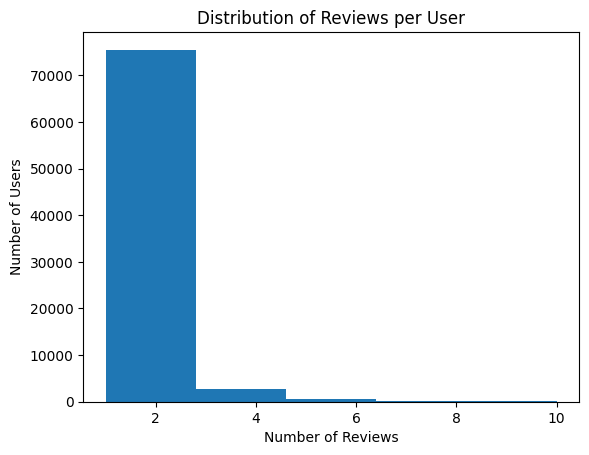

In [24]:
user_review_counts = df['user_id'].value_counts()
filtered_counts = user_review_counts[(user_review_counts >= 1) & (user_review_counts <= 10)]
plt.hist(filtered_counts, bins=5)
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Users')
plt.title('Distribution of Reviews per User')
plt.show()

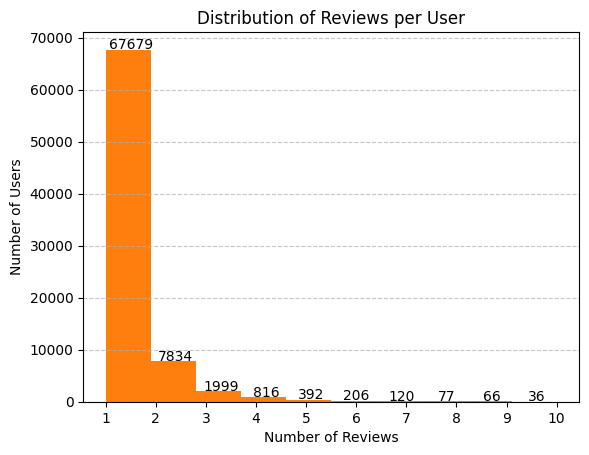

In [30]:
# ----------------- Your code here -----------------
plt.hist(filtered_counts, bins=10)
plt.xticks(range(1, 11))
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Users')
plt.title('Distribution of Reviews per User')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotating counts on bars
counts, bins, _ = plt.hist(filtered_counts, bins=10)
for count, x in zip(counts, bins):
    plt.text(x + 0.5, count + 100, str(int(count)), ha='center')

plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3592 (\N{THAI CHARACTER CHO CHAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3635 (\N{THAI CHARACTER SARA AM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3612 (\N{THAI CHARACTER PHO PHUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dis

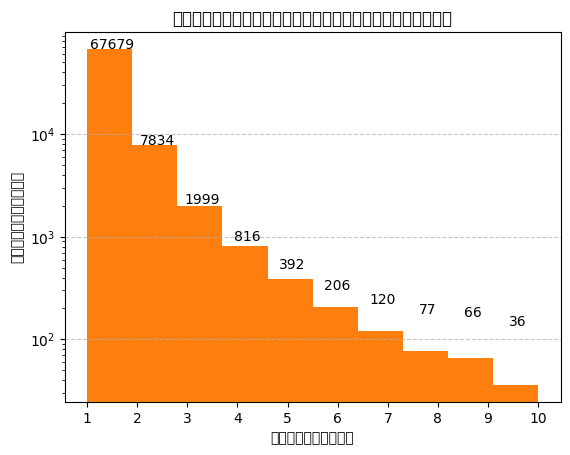

In [23]:
plt.hist(filtered_counts, bins=10)
plt.xticks(range(1, 11))
plt.yscale('log')
plt.xlabel('จำนวนรีวิว')
plt.ylabel('จำนวนผู้ใช้')
plt.title('การกระจายจำนวนรีวิวต่อผู้ใช้')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# ใส่จำนวนผู้ใช้บนแท่ง
counts, bins, _ = plt.hist(filtered_counts, bins=10)
for count, x in zip(counts, bins):
    plt.text(x + 0.5, count + 100, str(int(count)), ha='center')

plt.show()


สำรวจการแจกแจงของจำนวนรีวิวและจำนวนดาวที่แต่ละ business ได้รับ

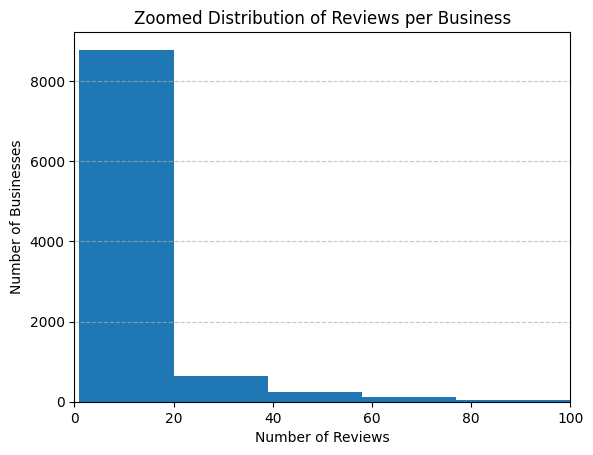

In [37]:
plt.hist(business_review_counts, bins=50)
plt.xlim(0, 100)  # Zoom into businesses with 100 reviews or fewer
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Businesses')
plt.title('Zoomed Distribution of Reviews per Business')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


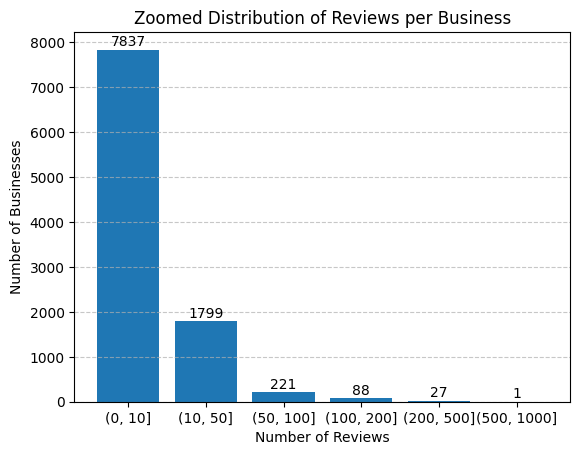

In [45]:
# สร้างช่วงของจำนวนรีวิว
review_bins = pd.cut(business_review_counts, bins=[0, 10, 50, 100, 200, 500, 1000])
bin_counts = review_bins.value_counts().sort_index()

# สร้างกราฟแท่ง
plt.bar(bin_counts.index.astype(str), bin_counts)
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Businesses')
plt.title('Zoomed Distribution of Reviews per Business')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# ใส่ตัวเลขบนแท่งกราฟ
for i, count in enumerate(bin_counts):
    plt.text(i, count + 10, str(count), ha='center', va='bottom')

plt.show()


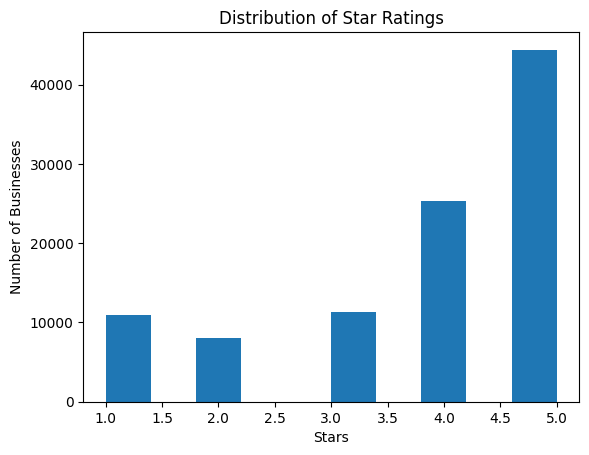

In [47]:
plt.hist(df['stars_review'], bins=10)
plt.xlabel('Stars')
plt.ylabel('Number of Businesses')
plt.title('Distribution of Star Ratings')
plt.show()

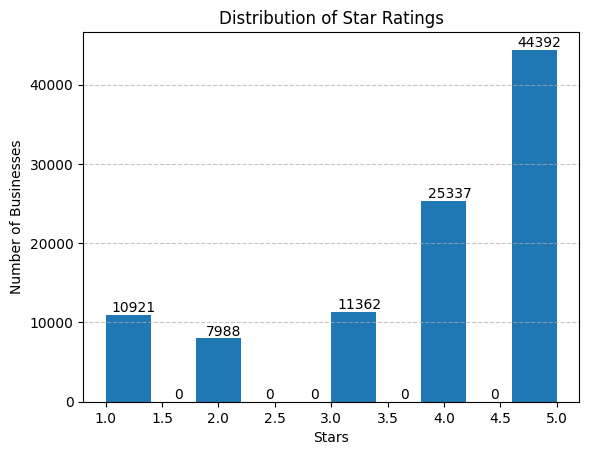

In [49]:
# สร้าง histogram
counts, bins, patches = plt.hist(df['stars_review'], bins=10)

# ใส่ป้ายตัวเลขบนแท่งกราฟ
for count, bin_edge in zip(counts, bins):
    plt.text(bin_edge + 0.25, count + 10, str(int(count)), ha='center', va='bottom')

# ปรับแต่งกราฟ
plt.xlabel('Stars')
plt.ylabel('Number of Businesses')
plt.title('Distribution of Star Ratings')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


มีธุรกิจกี่แบบ และธุรกิจในแต่ละแบบมีจำนวนเท่าไหร่

In [107]:
# prompt: มีธุรกิจกี่แบบ และธุรกิจในแต่ละประเภทมีจำนวนเท่าไหร่ แยก(,)ออกด้วย 10อันดับแรก

# Count the occurrences of each business category
business_categories_counts = businesses['categories'].str.split(', ').explode().value_counts()

# Get the top 10 categories
top_10_categories = business_categories_counts.head(10)

# Print the result
print("มีธุรกิจกี่แบบ และธุรกิจในแต่ละประเภทมีจำนวนเท่าไหร่ แยก(,)ออกด้วย 10อันดับแรก:")
print(top_10_categories)


มีธุรกิจกี่แบบ และธุรกิจในแต่ละประเภทมีจำนวนเท่าไหร่ แยก(,)ออกด้วย 10อันดับแรก:
categories
Restaurants         52268
Food                27781
Shopping            24395
Home Services       14356
Beauty & Spas       14292
Nightlife           12281
Health & Medical    11890
Local Services      11198
Bars                11065
Automotive          10773
Name: count, dtype: int64


* ลองแยก `categories` ออกเป็น category ย่อย แล้วสามารถนับหรือใช้ฟังก์ชัน Counter `from collections import Counter` ในการนับจำนวนหรือความถี่ของธุรกิจแต่ละแบบ \
ตัวอย่าง https://www.geeksforgeeks.org/counters-in-python-set-1/

In [108]:
from collections import Counter

categories = []
for index, row in businesses.iterrows():
  if type(row['categories']) is str:
    cat = row['categories'].split(',')
    for c in cat:
      categories.append(c.strip())

category_counts = Counter(categories)
print(category_counts)

Counter({'Restaurants': 52268, 'Food': 27781, 'Shopping': 24395, 'Home Services': 14356, 'Beauty & Spas': 14292, 'Nightlife': 12281, 'Health & Medical': 11890, 'Local Services': 11198, 'Bars': 11065, 'Automotive': 10773, 'Event Planning & Services': 9895, 'Sandwiches': 8366, 'American (Traditional)': 8139, 'Active Life': 7687, 'Pizza': 7093, 'Coffee & Tea': 6703, 'Fast Food': 6472, 'Breakfast & Brunch': 6239, 'American (New)': 6097, 'Hotels & Travel': 5857, 'Home & Garden': 5799, 'Fashion': 5739, 'Burgers': 5636, 'Arts & Entertainment': 5434, 'Auto Repair': 5433, 'Hair Salons': 5046, 'Nail Salons': 4621, 'Mexican': 4600, 'Italian': 4573, 'Specialty Food': 4233, 'Doctors': 3763, 'Pets': 3758, 'Real Estate': 3577, 'Seafood': 3539, 'Fitness & Instruction': 3293, 'Professional Services': 3270, 'Hair Removal': 3239, 'Desserts': 3186, 'Chinese': 3169, 'Bakeries': 3150, 'Grocery': 3139, 'Salad': 3064, 'Hotels': 2977, 'Chicken Wings': 2966, 'Cafes': 2756, 'Ice Cream & Frozen Yogurt': 2657, 'Ca

In [ ]:
# ----------------- Your code here -----------------


### ให้ตั้งปัญหาหรือคำถาม และวิเคราะห์ข้อมูลเพื่อตอบคำถามดังกล่าว

จาก category_counts ธุรกิจที่มีการแท็กมากกว่า 10000 ครั้ง มีคะแนน stars เฉลี่ยเท่าไหร่

In [157]:
# prompt: จาก category_counts  Restaurants ,Shopping ,Home Services, Beauty & Spas ,Nightlife ,Health & Medical ,Local Services,Bars,'Automotive มี stars เฉลี่ยเท่าไหร่

# Filter the DataFrame to include only the specified categories
selected_categories = ['Restaurants', 'Shopping', 'Home Services', 'Beauty & Spas', 'Nightlife', 'Health & Medical', 'Local Services', 'Bars', 'Automotive']
filtered_df = df[df['categories'].str.contains('|'.join(selected_categories), na=False)]

# Group by category and calculate the average stars
average_stars_by_category = filtered_df.groupby(filtered_df['categories'].str.split(', ').apply(lambda x: [cat.strip() for cat in x if cat.strip() in selected_categories]).apply(lambda x: x[0] if x else 'Other'))['stars_review'].mean()

# Print the result
print(average_stars_by_category)


categories
Automotive          3.625397
Bars                3.828415
Beauty & Spas       3.964792
Health & Medical    4.156589
Home Services       3.735581
Local Services      3.962250
Nightlife           3.806510
Other               4.115880
Restaurants         3.814739
Shopping            3.947948
Name: stars_review, dtype: float64


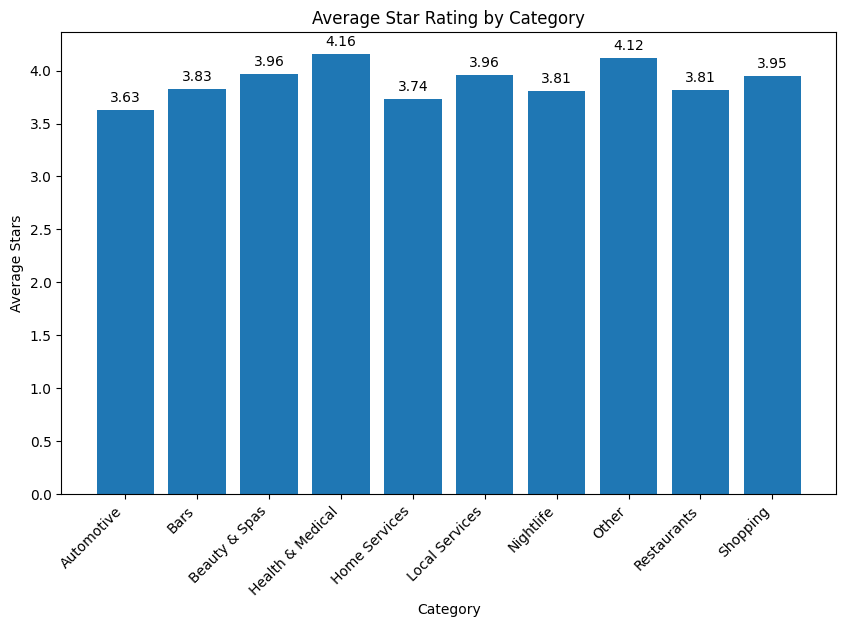

In [159]:
# prompt: สร้างกราฟจากข้างบน บอกคะแนนบนแท่งด้วย

# สร้างกราฟแท่ง
plt.figure(figsize=(10, 6))  # ปรับขนาดกราฟ
plt.bar(average_stars_by_category.index, average_stars_by_category.values)
plt.xlabel('Category')
plt.ylabel('Average Stars')
plt.title('Average Star Rating by Category')
plt.xticks(rotation=45, ha='right')  # หมุนชื่อหมวดหมู่ให้เอียง

# ใส่ป้ายตัวเลขบนแท่งกราฟ
for i, v in enumerate(average_stars_by_category.values):
    plt.text(i, v + 0.05, str(round(v, 2)), ha='center', va='bottom')

plt.show()


In [ ]:
#----------------------------------------------
# Your code starts here
# create some data visualization for the analysis and your presentation






## Problem 3: Retrieving Data from Internet

ให้แต่ละกลุ่มคิดหัวข้อที่สนใจ และทำการดึงข้อมูลเกี่ยวกับหัวข้อที่สนใจผ่าน url ด้วยฟังก์ชัน `urllib.request.urlopen` จากแหล่งข้อมูลออนไลน์อย่างน้อย 10 แห่ง รวบรวมข้อมูลให้เป็นหนึ่งเดียว

In [ ]:
#----------------------------------------------
# Your code starts here


เตรียมข้อมูลและทำความสะอาดข้อมูลด้วยการทำ lower case, tokenization, removing stopwords (as well as punctuations, unrelated symbols, etc.), stemming, lemmatization เป็นต้น

In [ ]:
#----------------------------------------------
# Your code starts here


Text Mining: ทำการวิเคราะห์ข้อความที่รวบรวมมาได้ พร้อมทั้งแสดงการนำเสนอที่สร้างสรรค์

In [ ]:
#----------------------------------------------
# Your code starts here


-----------------
# เสร็จแล้ววววว 🥳

สิ่งที่ต้องแนบส่ง:
* Notebook File (ตัวอย่าง "filename.ipynb") หรือ Link to Google Colab ซึ่งมีผลลัพธ์จากการรันโค้ดแสดงทั้งหมด
* Slides สำหรับการนำเสนอ **10** นาที ซึ่งประกอบไปด้วย
    * ตอบคำถามต่าง ๆ ใน Notebook
    * อธิบายวิธีการที่ใช้ และแสดง screenshots ของผลลัพธ์ที่ได้จาก Python Notebook โดยแสดงภาพและตาราง โดยไม่จำเป็นที่จะต้องนำเสนอ source code

** Note: แต่ละกลุ่มส่งแค่ครั้งเดียว **